In [1]:
import torch

from utils import Draw
from utils.DataLoader import Loader
from utils.OpeModel import OpeModel
from models.BBSpecNet import BinSpecCNN

In [2]:
classCount = 10
loader = Loader(classCount=classCount)
classes, train_loader, test_loader = loader.loader()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
model = BinSpecCNN(classCount=classCount)
opemodel = OpeModel(model, device, 0.001, train_loader, test_loader)
opemodel.load_state('b-bin', 96.92, 200, 10)

+-------+-------+-------+-------+-------+
|       |  ACC  |  SEN  |  SPE  |  PPR  |
+-------+-------+-------+-------+-------+
| S0002 | 0.997 | 0.988 | 0.998 | 0.984 |
| S0003 | 0.988 | 0.937 | 0.994 | 0.944 |
| S0004 | 0.997 | 0.987 | 0.998 | 0.983 |
| S0005 | 0.996 | 0.988 | 0.997 | 0.972 |
| S0006 | 0.992 | 0.992 | 0.992 | 0.936 |
| S0007 | 0.992 |  0.95 | 0.997 |  0.97 |
| S0008 | 0.997 | 0.973 | 0.999 | 0.991 |
| S0009 | 0.997 | 0.988 | 0.998 | 0.983 |
| S0010 | 0.987 | 0.911 | 0.995 | 0.957 |
| S0011 | 0.996 |  0.98 | 0.998 |  0.98 |
|  SUM  | 0.994 | 0.969 | 0.997 | 0.969 |
+-------+-------+-------+-------+-------+


<Figure size 432x288 with 0 Axes>

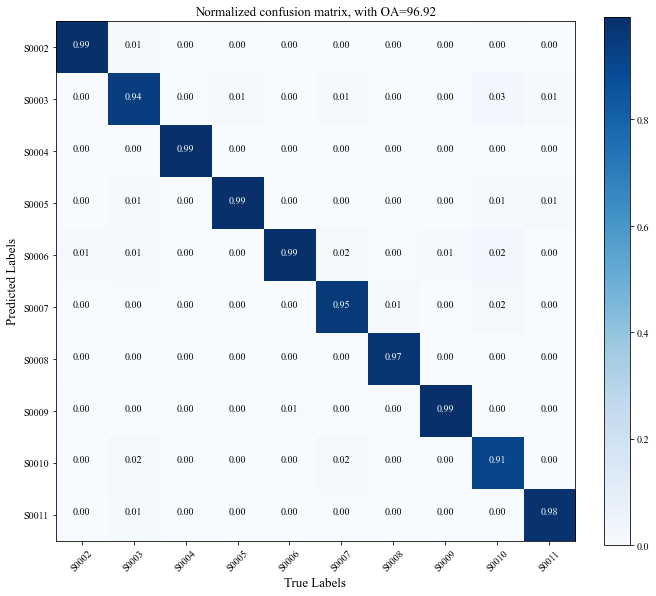

In [4]:
# Draw.plot_cfm(model, device, test_loader, classes)
model, acc, loss = opemodel.get_state()
Draw.plot_cfm(model, device, test_loader, classes)
# Draw.plot_loss_acc(acc, loss)
# opemodel.train_strategy(150)
# opemodel.modify_lr(0.00001)
# opemodel.train_strategy(30)


In [ ]:
opemodel.save_state('bin', 180)

In [ ]:
# opemodel.train_strategy(100)
# opemodel.modify_lr(0.00001)
# opemodel.train_strategy(20)
# model_ini = model
opemodel.load_state('bin', 96.88, 180, cnt=classCount)
model, acc, loss = opemodel.get_state()
model = model.to(device)
# Draw.plot_loss_acc(acc, loss)

In [ ]:
Draw.plot_cfm(model, test_loader, classes)

In [ ]:
_, acc_list, loss_list = opemodel.get_state()
Draw.plot_loss_acc(acc_list, loss_list)
Draw.plot_cfm(model, test_loader, classes)